In [1]:
#Importing useful modules.
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:

%matplotlib inline

In [21]:

def Open_File(file_name):
    '''Function takes one input argument, a JSON-file,corresponding to the saved file-name,for each park, 
    from the result of the request to Twitters API and converts the JSON-file to a dictionary.   
    IN: file_name(JSON-object).
    OUT: Tweet_Data (Dictionary), Dictionary of the JSON-file.'''
    
    with open(file_name) as file:
        Tweet_Data= json.load(file)

    return Tweet_Data

In [22]:
def ToDataframe_text(Tweet_Data):
    '''  Function takes a dictionary corresponding to the JSON-file for each park, Extracts the "Text" data and returns
    a Pandas DataFrame with one column,Tweet/Text-data, were each row represents one unique Tweet.
    IN: Tweet_Data(Dictionary).
    OUT: DataFrame, with one column, Tweet/text-data.'''
    
    Df_list=[]
    for item in Tweet_Data['statuses']:
        if item['truncated']==True:
            Df_list.append(item['extended_tweet']['full_text'])
        else:
            Df_list.append(item['text'])
    pd.set_option('display.max_colwidth',-1)
    Df= pd.DataFrame(data=Df_list,columns=['Tweet'])
    return Df

'uncomment beloew rows for quick visualization'
#Tweet_Data=Open_File('TwitterData_Json'+'/Hagaparken_Tweet15-19.json')
#df_text= ToDataframe_text(Tweet_Data)


In [23]:
#importing pythons regular expression library.
import re
def clean_text_round1(text):
    ''' Funtion takes one input argument,the tweet column in our Dataframe,and removes URL-references and special characters
    that doesnt influence the sentiment such att #,numbers and /(see below) using pythons regular expression library. 
    Function returns a cleaned DataFramed. 
    IN: DataFranme, Tweet(text)-data column.
    OUT: DataFrame, cleaned from URL-references and special characters.'''
    
    text=re.sub(r'((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)','',text)
    text=re.sub(r'@\S+ ', r'', text)
    text= re.sub(r'[@0-9.#/"?;():-]', '', text)
    return text


'uncomment below rows for quick visualization'
#round1=lambda tweet:clean_text_round1(tweet)
#data_clean=pd.DataFrame(df_text['Tweet'].apply(round1))
#data_clean.loc[[4,13,15,32,40,41,47,51,53],['Tweet']]

In [24]:

def clean_text_round2(text):
    ''' Funtion takes one input argument,the tweet column in our Dataframe,and removes the special characters
    "\n" , "''", "," and "-" using the python regular expresson library,  and returns a cleaned DataFrame.
    IN: Pandas DataFrame.
    OUT: Pandas DataFrame, containing only alphabetic letters, emojis and exclamation mark("!").'''
    
    text= re.sub(r'[\n]','',text)
    text=re.sub(r'[”_,]','',text)
    return text


'uncomment below rows for quick visualization'
#data_clean['Tweet']=data_clean['Tweet'].apply(lambda tweet: clean_text_round2(tweet))
#data_clean.loc[[4,13,15,32,40,41,47,51,53],['Tweet']]





In [25]:
# Cleaning for stopwords
from nltk.corpus import stopwords
''' The code below removes stopwords from each tweet in our DataFrame using pythons nltk library. 
Before removing stopwords from Tweet-data, I remove the word "inte" from the stopword-list since it influence the sentiment.'''

stop= stopwords.words('swedish')
stop.remove('inte')


'uncomment below rows for quick visualization'
#data_clean=pd.DataFrame(data_clean['Tweet'].apply(lambda tweet: ' '.join([word for word in tweet.split(' ') if word not in (stop) ])))
#data_clean.head(30)
#data_clean.loc[[4,13,15,32,40,41,47,51,53],['Tweet']]






In [26]:
#Sentiment score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment(Tweet):
    ''' Function takes one input argument, the tweet/text column in our Dataframe and returns a new column corresponding to the
    sentiment score(compund) for each Tweet using the VADER-lexicon. 
    IN: DataFrame, Tweet-data column.
    OUT: DataFrame with one new column, the sentiment score.'''
    
    sentiment_obj= SentimentIntensityAnalyzer()
    sentiment_score=sentiment_obj.polarity_scores(Tweet)
    
    return sentiment_score['compound'] 


'uncomment below rows for quick visualization'
#data_clean['Sentiment score']= data_clean['Tweet'].apply(lambda tweet: sentiment(tweet))
#data_clean.head(50)




In [27]:

#lägger till år och date som kolumner
def ToDataframe_time(Tweet_Data):
    ''' Function takes a dictionary corresponding to the JSON-file for each park, Extracts the "Timestamp" data for each Tweet
    and returns a Pandas DataFrame with 5 columns one for each attribute of the Timestamp data corresponding to:
    "DayofWeek", "Month", "Date", "Hour" and "Year". 
    IN: Tweet_Data(Dictionary).
    OUT: Pandas DataFrame with 5 columns,"DayofWeek", "Month", "Date", "Hour" and "year". '''
    
    Df_list=[]
    
    for item in Tweet_Data['statuses']:
        Df_list.append(item['created_at'])
    
    Df_org=pd.DataFrame(data=Df_list,columns=['Timestamp'])
    
    
    Df_org['Dayofweek']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[0])
    Df_org['Month']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[1])
    Df_org['Date']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[2])
    Df_org['Hour']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[3][:2])
    Df_org['Year']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[-1])
    
    return Df_org
        


    
#Tweet_Data=Open_File('TwitterData_Json'+'/Hagaparken_Tweet15-19.json')
#df_time= ToDataframe_time(Tweet_Data)
#df_time.head()



In [28]:
''' Adding the time DataFrame to our original DataFrame. The new DataFrame has the following columns:
"Tweet", "Sentiment Score", "DayofWeek", "Month", "Date", "Hour" and "year". 
'''
df_senti['Year']=df_time['Year']
df_senti['Month']=df_time['Month']
df_senti['Day']=df_time['Dayofweek']
df_senti['Hour']=df_time['Hour']



In [29]:
def hue(score):
    ''' Function Takes one input argument, The sentiment score column in our DataFrame, and returns a new column corresponding to 
    the classified semantic orientation of the Tweet based on the corresponding sentiment score. 
    IN: DataFrame column(Sentiment Score).
    OUT: DataFrame containing one new column with the coresponding semantic orientation positive, negative or neutral) for each tweet.
    '''
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


#df_senti['Sentiment']=df_senti['Sentiment score'].apply( lambda score: hue(score))
#df_senti.head(20)


Text(0.5, 1.0, 'Total Sentiment Distribution of Tweets ')

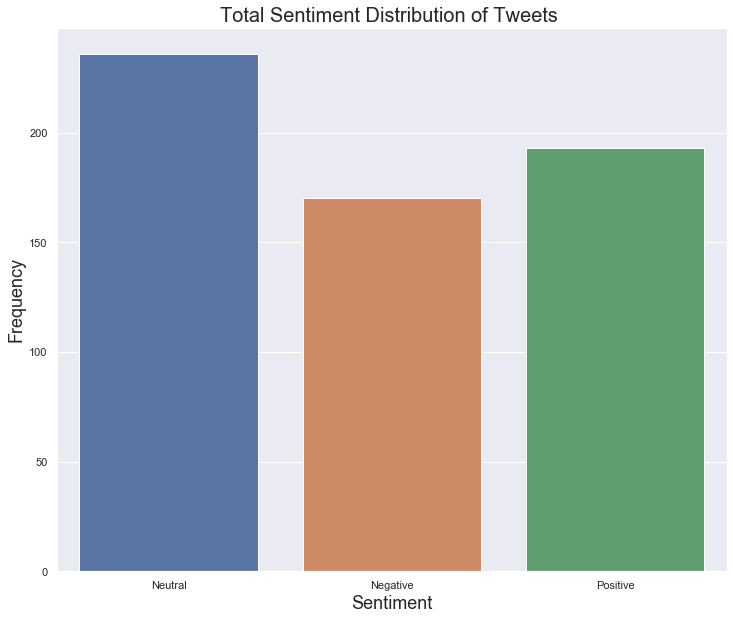

In [30]:


#The code below creats a plot of the total Sentiment Distribution(Positive,Negative,Neutral) for all the Tweets. 

sns.set(rc={'figure.figsize':(20,10)})
sns.set_palette('deep')
fig= plt.figure(figsize=(12,10))

#Countplot All Sentiment
ax_count=sns.countplot(x='Sentiment',order=['Neutral','Negative','Positive'], data=df_senti)
ax_count.set_xlabel('Sentiment',fontsize=18) 
ax_count.set_ylabel('Frequency',fontsize=18)
ax_count.set_title('Total Sentiment Distribution of Tweets ',fontsize=20)

#fig.savefig('Rålambshovsparken_sentiment_Count.pdf')


In [31]:
# read data
#df_senti=pd.read_pickle('df_before_plots_Rå')

''' The code below is the main function. Runs all the previous steps and
creates a 2X2 plot of the sentiment distribution of our Dataframe using Seaborn.The created plots are the following:

1: Seasonal  distrubtion of Sentiment. x-axis:Season, y-axis:Frequency.
2: Monthly distrubtion of Sentiment Score. x-axis:Month, y-axis:Sentiment Score(from -1 to 1).
3: Weekday distrubtion of Sentiment Score. x-axis:Weekday, y-axis:Sentiment Score(from -1 to 1).
4: Hourly distrubtion of Sentiment. x-axis:Hour, y-axis:Frequency.
'''

def main():
    
    # Reading Tweet-data
    Tweet_Data=Open_File('TwitterData_Json'+'/Hagaparken_Tweet15-19.json')
    df_text= ToDataframe_text(Tweet_Data)
    
    # cleaning round 1
    round1=lambda tweet:clean_text_round1(tweet)
    data_clean=pd.DataFrame(df_text['Tweet'].apply(round1))
    
    # cleaning round 2
    data_clean['Tweet'] = data_clean['Tweet'].apply(lambda tweet: clean_text_round2(tweet))
    
    # removing stopwords
    df_senti = pd.DataFrame(data_clean['Tweet'].apply(lambda tweet: ' '.join([word for word in tweet.split(' ') if word not in (stop) ])))
    
    # Sentiment score
    df_senti['Sentiment score'] = df_senti['Tweet'].apply(lambda tweet: sentiment(tweet))
    
    # Adding time-data to dataframe
    df_time= ToDataframe_time(Tweet_Data)
    
    # Combining the text-dataframe and time-dataframe
    df_senti['Year'] = df_time['Year']
    df_senti['Month'] = df_time['Month']
    df_senti['Day'] = df_time['Dayofweek']
    df_senti['Hour'] = df_time['Hour']
    
    # Classyfing the sentiment score
    df_senti['Sentiment'] = df_senti['Sentiment score'].apply( lambda score: hue(score))
    
    
    
    # Initiating  2x2 figure
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_palette('colorblind')
    fig,ax= plt.subplots(2,2,figsize=(20,18))


    # Remove Neutral sentiments-since they dont contribute to meaningful info
    neu=df_senti[df_senti['Sentiment']=='Neutral'].index
    df_senti.drop(neu,inplace=True)


    # Month: barlot 
    ax_month=sns.barplot(x='Month',y='Sentiment score',hue='Sentiment',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],data=df_senti,ax=ax[0][1])
    ax_month.set_xlabel('Month',fontsize=18) 
    ax_month.set_ylabel('<-- Negative --------- Positive -->',fontsize=18)
    ax_month.set_title('Monthly distribution of Sentiment score',fontsize=20)


    # Weekday Swarmpplot
    ax_day= sns.swarmplot(x='Day',y='Sentiment score',hue='Sentiment',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], data=df_senti,ax=ax[1][0])
    ax_day.set_xlabel('Weekday',fontsize=18) 
    ax_day.set_ylabel('<-- Negative --------- Positive -->',fontsize=18)
    ax_day.set_title('Weekday distribution of Sentiment score',fontsize=20)


    # Season countplot
    df_senti['Month'].replace(['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Jan','Feb','Dec'],['spring','spring','spring','summer','summer','summer','fall','fall','fall','winter','winter','winter'],inplace=True)

    ax_season=sns.countplot(x='Month',hue='Sentiment',order=['spring','summer','fall','winter',],data=df_senti[::-1],ax=ax[0][0])
    ax_season.set_xlabel('Season',fontsize=18) 
    ax_season.set_ylabel('Frequency',fontsize=18)
    ax_season.set_title('Seasonal distribution of Sentiment',fontsize=20)


    # Hour countplot
    ax_hour= sns.countplot(x='Hour',hue='Sentiment',data=df_senti,ax=ax[1][1])
    ax_hour.set_xlabel('Hour',fontsize=18) 
    ax_hour.set_ylabel('Frequency',fontsize=18)
    ax_hour.set_title('Hourly distribution of Sentiment',fontsize=20)



    fig.show()
    #fig.savefig('Rålambshovsparken_sentiment_plots.pdf')

    
    
'Uncomment to run program'
#main()








